# This example demonstrate how to train region classification (standart image classification model).

In [1]:
import os
import sys
import torch
import warnings
from datetime import datetime
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Nomeroff-Net path
NOMEROFF_NET_DIR = os.path.abspath('../../../../')
sys.path.append(NOMEROFF_NET_DIR)

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# # auto download latest dataset
# from nomeroff_net.tools import modelhub

# # auto download latest dataset
# info = modelhub.download_dataset_for_model("numberplate_options")
# PATH_TO_DATASET = info["dataset_path"]

# local path dataset
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

PATH_TO_LINE_CUSTOM_DATASET = f'{PATH_TO_DATASET}_custom_line'

In [5]:
PATH_TO_DATASET

'/mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example'

In [6]:
PATH_TO_LINE_CUSTOM_DATASET

'/mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line'

In [7]:
DATASET_NAME = "line"
VERSION = f"{datetime.now().strftime('%Y_%m_%d')}_pytorch_lightning"

RESULT_PATH = os.path.join(NOMEROFF_NET_DIR, "./data/models/", 'numberplate_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [8]:
from nomeroff_net.tools import custom_options
#from nomeroff_net import OptionsDetector
from nomeroff_net.pipes.number_plate_classificators.options_detector_v2 import OptionsDetector

class_region_custom = [
    ["ru-military","ua-military"],
    "eu-ua-2015",
    "eu-ua-2004",
    "eu-ua-1995",
    "eu",
    "xx-transit",
    "ru",
    "kz",
    "eu-ua-ordlo-dpr",
    "eu-ua-ordlo-lpr",
    "ge",
    "by",
    "su",
    "kg",
    "am"
]

class_count_lines_custom = ["1", "2", "3"]

state_ids_only_labels = ["not filled"]

customOptionsMakerCountLine = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_LINE_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels,
    items_per_class = 2
)

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


In [9]:
customOptionsMakerCountLine.rebalance_count_lines('train', with_aug=True, verbose=True)

Rebalancing is possible only once!


1

In [10]:
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        #self.class_region = class_region_custom
        self.class_region = ["military",
            "eu-ua-2015",
            "eu-ua-2004",
            "eu-ua-1995",
            "eu",
            "xx-transit",
            "ru",
            "kz",
            "eu-ua-ordlo-dpr",
            "eu-ua-ordlo-lpr",
            "ge",
            "by",
            "su",
            "kg",
            "am"
        ]
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 2
        self.batch_size       = 2
        
        # count gpu for train
        self.gpus = torch.cuda.device_count()
        
        self.height         = 50
        self.width         = 300
        


In [11]:
# initialize region detector.
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_LINE_CUSTOM_DATASET, verbose=1, num_workers=1)

START PREPARING


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 13612.96it/s]

DATA PREPARED


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Finding best initial lr:   0%|          | 0/1 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
Restoring states from the checkpoint path at /mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/train/classification/.lr_find_38d2df18-3088-42e1-8d85-e8b6762e22a4.ckpt
Restored all states from the checkpoint file at /mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/train/classification/.lr_find_38d2df18-3088-42e1-8d85-e8b6762e22a4.ckpt
Failed to compute suggestion for learning rate because there are not enough points. Increase the loop iteration limits or the size of your dataset/dataloader.
Failed to compute suggestion for learning rate because there are not enough points. Increase the loop iteration limits or the size of your dataset/dataloader.


Found lr: None


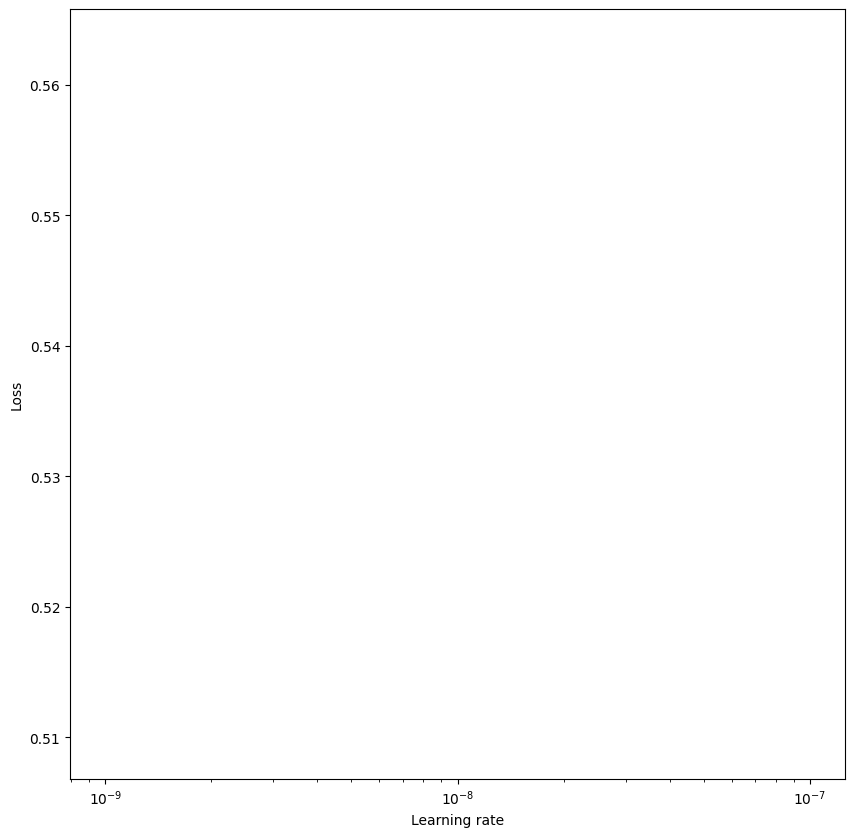

In [12]:
# train
lr_finder = npClassificator.tune_line_model()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [13]:
# train
model = npClassificator.train_line_model()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type         | Params
---------------------------------------
0 | model | EfficientNet | 20.2 M
---------------------------------------
20.2 M    Trainable params
0         Non-trainable params
20.2 M    Total params
80.725    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [14]:
npClassificator.prepare(PATH_TO_DATASET, verbose=1)

START PREPARING


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 17377.53it/s]

DATA PREPARED


In [15]:
npClassificator.save_line_model(RESULT_PATH)

model save to /mnt/var/www/projects_computer_vision/nomeroff-net/./data/models/numberplate_line_2024_09_06_pytorch_lightning.ckpt


# classification raport

In [16]:
npClassificator.load_line_model(RESULT_PATH)

NPLineNet(
  (model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): FusedMBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        )
        (1): FusedMBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(24, 

In [21]:
from nomeroff_net.data_loaders import ImgGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

def options_classification_report(npClassificator, 
                                  path_dir, 
                                  mode_torch="gpu" if torch.cuda.device_count() else "cpu"):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    imageGenerator.build_data()
    gen = imageGenerator.path_generator()
    
    out_idx_reg_all = []
    out_idx_line_all = []
    label_idx_reg_all = []
    label_idx_line_all = []
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
            npClassificator.line_model.cuda()
        with torch.no_grad():
            outputs = npClassificator.line_model(inputs)
        label_reg = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
        
        out_idx_reg = torch.max(outputs, 1)[1].cpu().numpy()
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        
        out_idx_reg_all.extend(out_idx_reg)
        label_idx_reg_all.extend(label_idx_reg)
    print("\n\nclass region classification report:")
    print(classification_report(label_idx_reg_all, 
                                out_idx_reg_all, 
                                target_names=npClassificator.count_lines))
    
    cm = confusion_matrix(label_idx_reg_all, out_idx_reg_all)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=npClassificator.count_lines)
    disp.plot()
    plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 6503.92it/s]
libpng warning: iCCP: known incorrect sRGB profile




class region classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         1
           3       0.06      1.00      0.11         1

    accuracy                           0.06        18
   macro avg       0.02      0.33      0.04        18
weighted avg       0.00      0.06      0.01        18



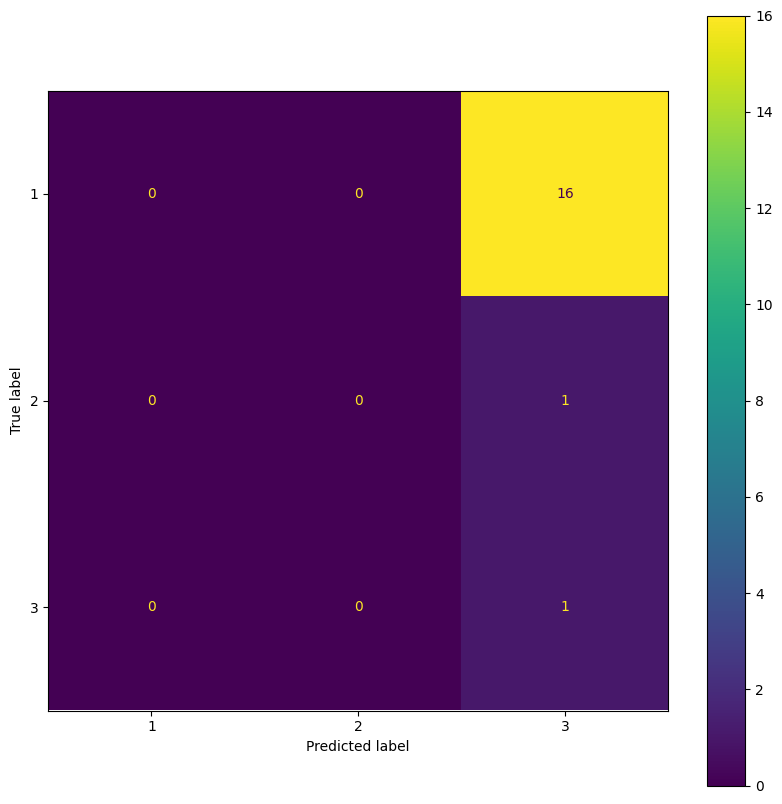

In [22]:
options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "test"))

# Check small accuracy images

In [23]:
npClassificator.load_line_model(RESULT_PATH)

NPLineNet(
  (model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): FusedMBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        )
        (1): FusedMBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(24, 

In [24]:
%matplotlib inline

In [25]:
from nomeroff_net.data_loaders import ImgGenerator
import torch
import json
import cv2
import matplotlib.pyplot as plt

def show_img(img_path):
    img = cv2.imread(img_path)
    img = img[..., ::-1]
    plt.imshow(img)
    plt.show()
    
def mark_for_moderation(p):
    json_filepath = p.replace('/img/','/ann/').replace('.png','.json')
    item_data = json.load(open(json_filepath, 'r'))
    if not item_data['moderation']:
        item_data['moderation'] = { "moderatedBy": "dimabendera" }
    item_data['moderation']["isModerated"] = 0
    with open(json_filepath, "w") as json_file:
        json.dump(item_data, json_file)    

def small_acc(npClassificator, 
              path_dir=os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "test"), 
              mode_torch="gpu" if torch.cuda.device_count() else "cpu", 
              min_acc=0.75):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    print("start imageGenerator build")
    imageGenerator.build_data()
    print("end imageGenerator build")
    gen = imageGenerator.path_generator()

    cnt = 0
    cnt_all = 0
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
        outputs = npClassificator.line_model(inputs)
        label_reg = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
        out_idx_reg = torch.max(outputs, 1)[1].cpu().numpy()
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        
        # check reg
        for o, l, p, tens in zip(out_idx_reg, label_idx_reg, img_paths, outputs[0]):
            cnt_all += 1
            if o != l:
                print("[WRONG REGION PREDICTED] pred {}[{}] -> {}[{}] source: {}".format(o,npClassificator.class_region[o], l, npClassificator.class_region[l], p))
                #mark_for_moderation(p)
                show_img(p)
                cnt += 1
    print("Wrong detection: {} numberplates of {}".format(cnt, cnt_all))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 6335.81it/s]

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/ru-military.png


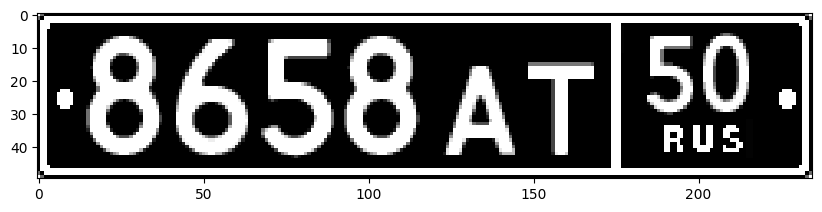

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/kz.png


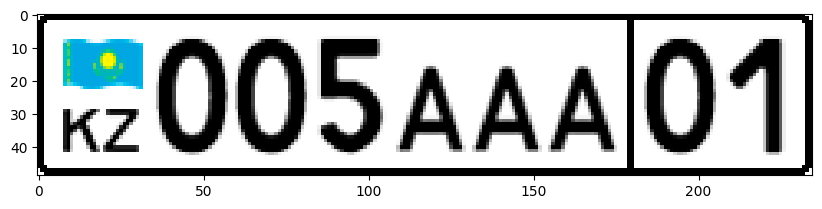

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/xx-transit.png


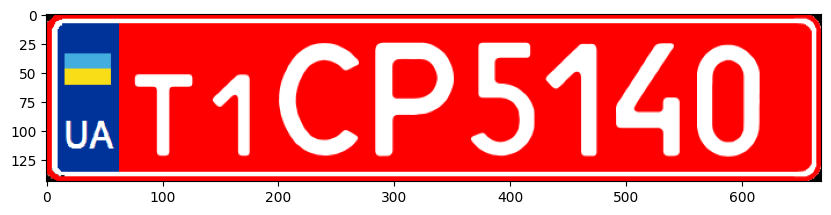

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/by.png


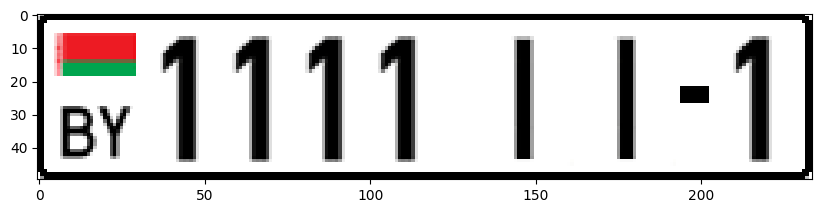

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/su.png


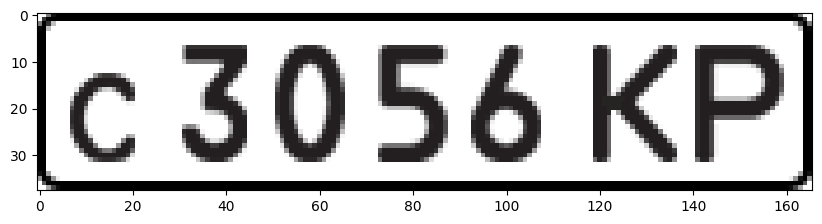

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/eu-ua-ordlo-dpr.png


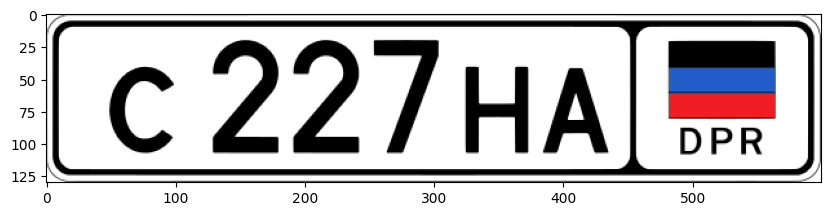

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/eu-ua-ordlo-lpr.png


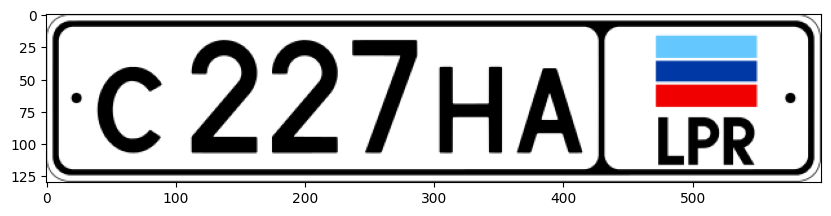

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/am.png


libpng warning: iCCP: known incorrect sRGB profile


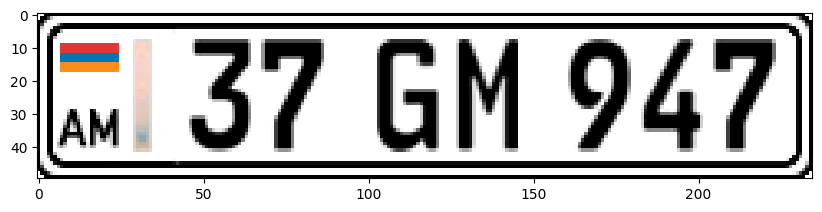

libpng warning: iCCP: known incorrect sRGB profile


[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/ua-military.png


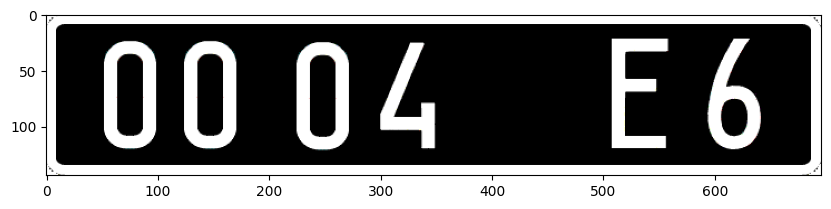

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/ru.png


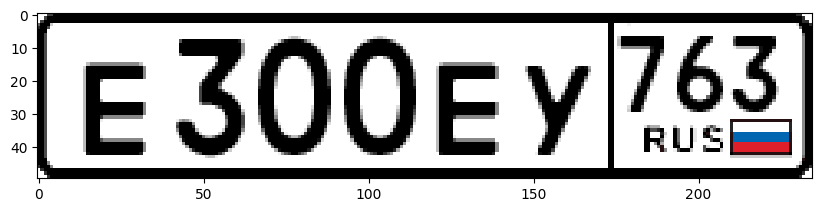

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/kg.png


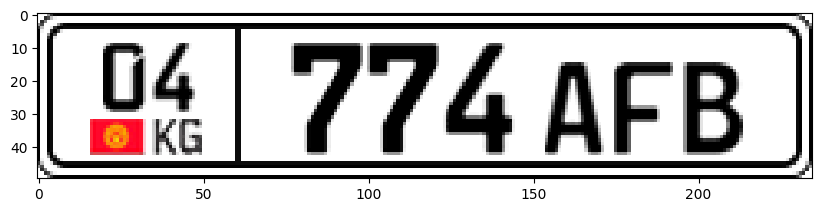

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/eu-ua-2004.png


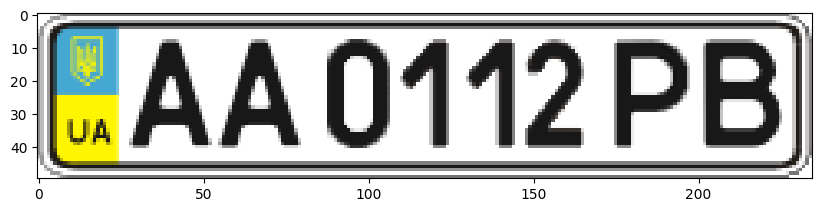

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/ge.png


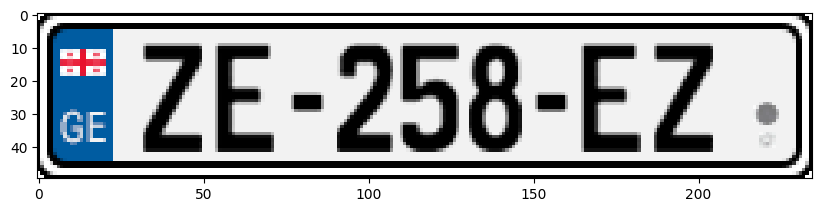

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/eu-ua-2015.png


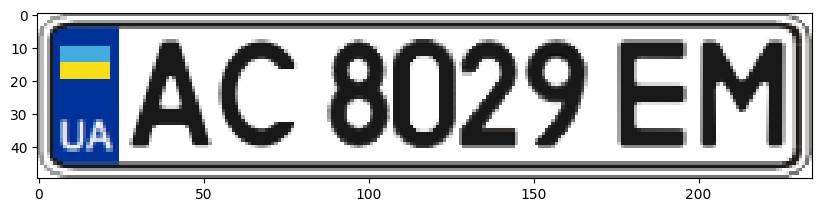

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/eu-ua-1995.png


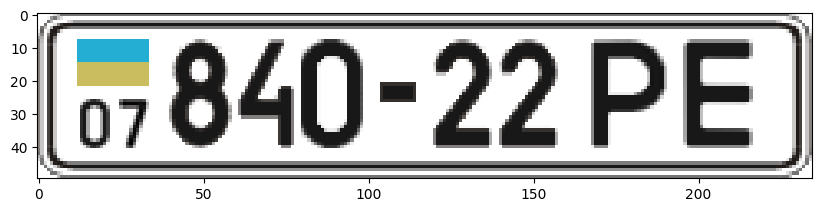

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 1[eu-ua-2015] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/eu-ua-2015-2.png


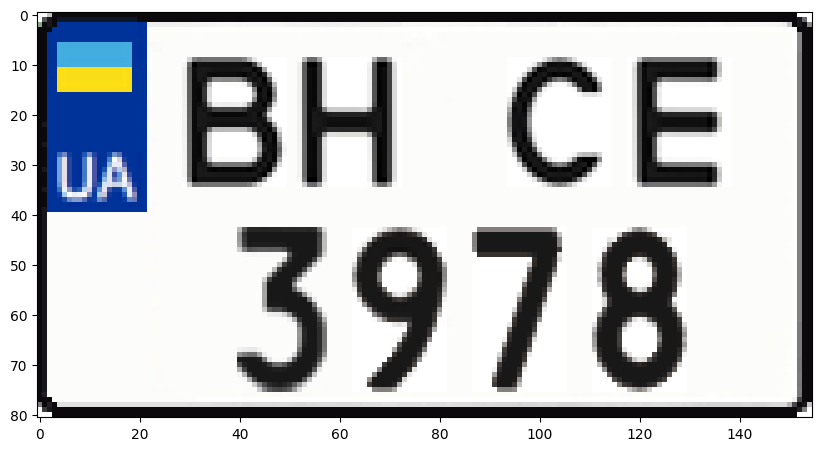

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 0[military] source: /mnt/var/www/projects_computer_vision/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line/test/img/eu.png


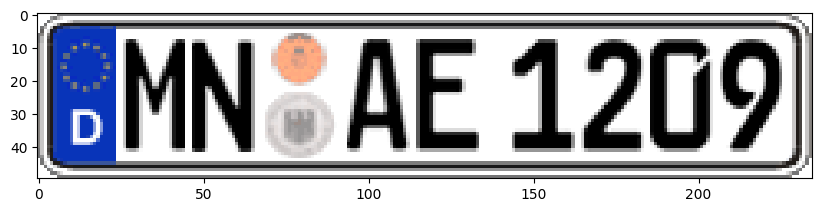

Wrong detection: 17 numberplates of 18


In [26]:
small_acc(npClassificator, os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "test"))

In [50]:
#small_acc(npClassificator, os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "train"))

In [51]:
#small_acc(npClassificator, os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "val"))